In [3]:
import pandas as pd

# Use the direct path where the file is uploaded in Colab
file_path = "/content/Mall_Customers.csv"
df = pd.read_csv(file_path)

# Display first few rows
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Check for missing values
print(df.isnull().sum())

# Display basic statistics
print(df.describe())

# Show column names
print(df.columns)


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000
Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


<ipython-input-5-2cdfae9fa2d2>:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')


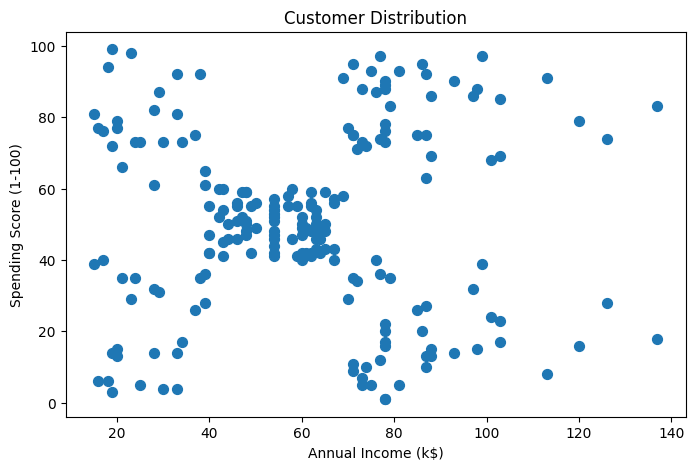

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant columns
X = df.iloc[:, [3, 4]].values  # Annual Income & Spending Score

# Scatter plot of raw data
plt.figure(figsize=(8,5))
plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Distribution")
plt.show()

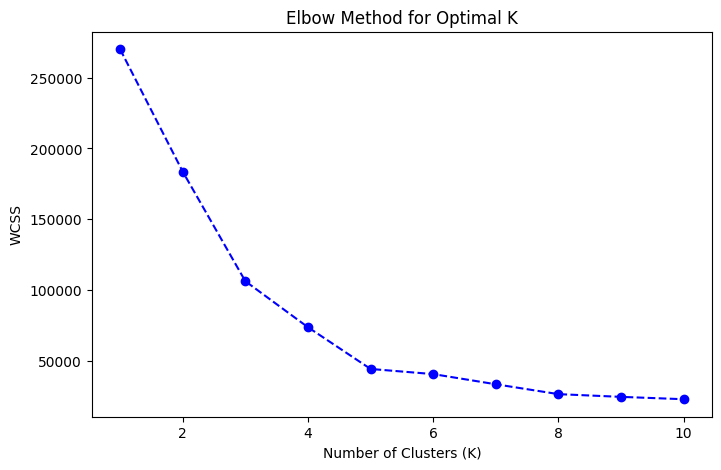

In [6]:
from sklearn.cluster import KMeans

# Finding the optimal number of clusters using Elbow Method
wcss = []  # Within-cluster sum of squares

for i in range(1, 11):  # Checking for K=1 to K=10
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

In [8]:
# Apply K-Means with optimal K (change 5 if necessary)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Add cluster labels to dataframe
df['Cluster'] = y_kmeans
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


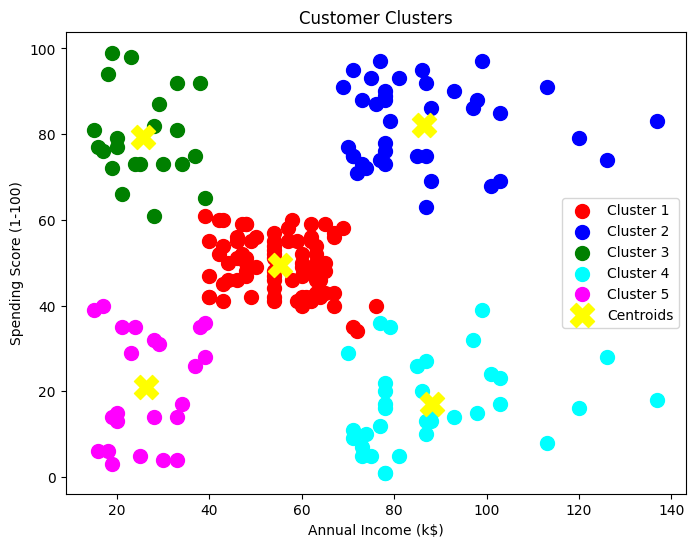

In [9]:
# Define colors for each cluster
colors = ['red', 'blue', 'green', 'cyan', 'magenta']

plt.figure(figsize=(8,6))

for i in range(5):  # Loop through each cluster
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1],
                s=100, c=colors[i], label=f'Cluster {i+1}')

# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='yellow', marker='X', label='Centroids')

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Clusters")
plt.legend()
plt.show()
